In [2]:
from tensorflow.keras.layers import Dense, Flatten , Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
print("All imports are done")

All imports are done


In [3]:
imageSize = [224, 224]
vgg=VGG16(input_shape=imageSize+[3],weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
#dont train existing weights
for layer in vgg.layers:
    layer.trainable=False

In [5]:
x=Flatten()(vgg.output)

In [6]:
prediction=Dense(17,activation='softmax')(x)

In [7]:
#create a model object
model=Model(inputs=vgg.input,outputs=prediction)

In [8]:
#view the summary  of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 17)             │       426,513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,141,201 (57.76 MB)

 Trainable params: 426,513 (1.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
#tell the model what cost and optimization whether to use
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
    run_eagerly=True
    )

In [10]:
#import image data generator library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [12]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Data/Dataset/train",
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="categorical")
test_set=test_datagen.flow_from_directory(
    "/content/drive/MyDrive/Data/Dataset/test",
    target_size=(224,224),
    batch_size=32
)

Found 655 images belonging to 17 classes.
Found 183 images belonging to 17 classes.


In [13]:
import sys
#fit the model
r=model.fit(
    training_set,
    validation_data=test_set,
    epochs=100,
    steps_per_epoch=len(training_set)//3,
    validation_steps=len(test_set)//3
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 238s 33s/step - accuracy: 0.0395 - loss: 3.8560 - val_accuracy: 0.0938 - val_loss: 4.1042
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 77s 13s/step - accuracy: 0.1344 - loss: 3.4233 - val_accuracy: 0.1719 - val_loss: 3.0629
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 8s/step - accuracy: 0.1819 - loss: 2.8082 - val_accuracy: 0.1250 - val_loss: 3.3399
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - accuracy: 0.1858 - loss: 2.7584 - val_accuracy: 0.2500 - val_loss: 2.7639
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.2964 - loss: 2.5462 - val_accuracy: 0.2656 - val_loss: 2.4420
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.3313 - loss: 2.2878 - val_accuracy: 0.2656 - val_loss: 2.4101
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3131 - loss: 2.3470 - val_accuracy: 0.3438 - val_loss: 1.9840
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.2896 - loss: 2.1057 - val_accuracy: 0.3906 - val_loss: 2.00

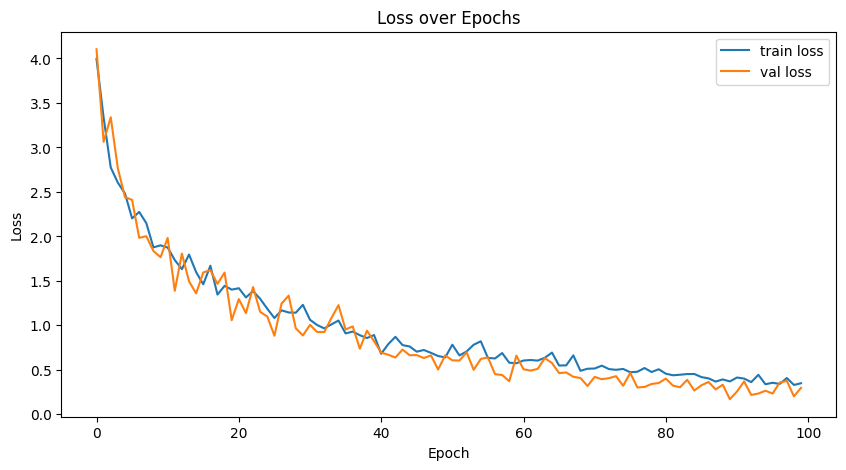

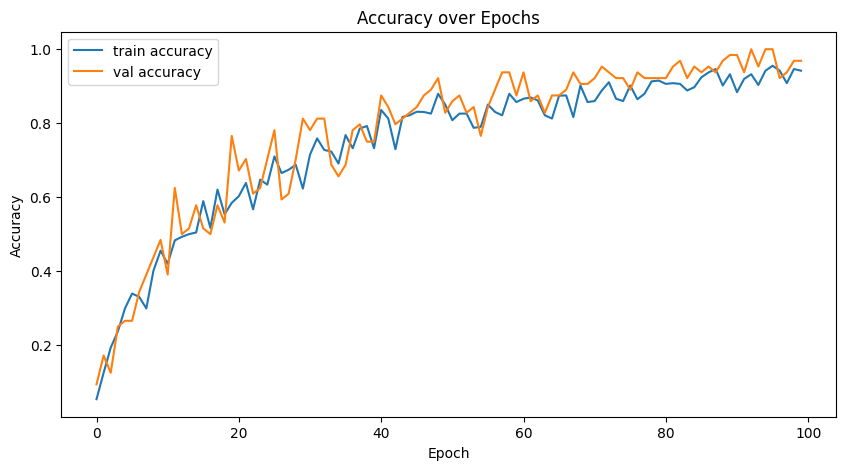

In [14]:
import matplotlib.pyplot as plt

# plot the loss
plt.figure(figsize=(10, 5))
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the accuracy
plt.figure(figsize=(10, 5))
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model.save("vgg-16-nail-disease.h5")

In [24]:
#import load  model class for loading h5 file
from tensorflow.keras.models import load_model
#import image class to process the images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

In [25]:
#load saved model file
model=load_model("vgg-16-nail-disease.h5")

In [26]:
#load one random image from local systems
img=image.load_img("/content/drive/MyDrive/Data/Dataset/test/Darier_s disease/1.PNG",target_size=(224,224))

In [27]:
#convert image to array format
x=image.img_to_array(img)


In [28]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step


array([[6.0373545e-01, 1.4135712e-04, 5.6570973e-03, 2.6377751e-02,
        3.3465354e-04, 1.5200497e-05, 1.1620098e-03, 1.0355973e-03,
        7.4282329e-04, 1.2463321e-02, 1.3154429e-01, 1.9219936e-01,
        2.4717541e-03, 1.2362153e-02, 7.0302673e-03, 5.1224657e-04,
        2.2146457e-03]], dtype=float32)